In [1]:
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.utils import array_to_img, img_to_array, load_img


In [2]:
# Setting path for dataset

train_data = "/content/drive/MyDrive/Surface_Defect_Detection/NEU Metal Surface Defects Data/train"
test_data = "/content/drive/MyDrive/Surface_Defect_Detection/NEU Metal Surface Defects Data/test"
val_data = "/content/drive/MyDrive/Surface_Defect_Detection/NEU Metal Surface Defects Data/valid"

print("Path : ", os.listdir("/content/drive/MyDrive/Surface_Defect_Detection/NEU Metal Surface Defects Data/train"))
print("Train data : ", os.listdir(train_data))
print("Test data : ", os.listdir(test_data))
print("Validation data : ", os.listdir(val_data))

Path :  ['Inclusion', 'Scratches', 'Rolled', 'Pitted', 'Patches', 'Crazing']
Train data :  ['Inclusion', 'Scratches', 'Rolled', 'Pitted', 'Patches', 'Crazing']
Test data :  ['Inclusion', 'Rolled', 'Scratches', 'Pitted', 'Patches', 'Crazing']
Validation data :  ['Pitted', 'Rolled', 'Patches', 'Inclusion', 'Crazing', 'Scratches']


In [3]:
#Examining a class of defect, same no. of images are there for each class for training, test and validation.
print("Scratches")
print("Training Images:",len(os.listdir(train_data+'/'+'Scratches')))
print("Testing Images:",len(os.listdir(test_data+'/'+'Scratches')))
print("Validation Images:",len(os.listdir(val_data+'/'+'Scratches')))

Scratches
Training Images: 276
Testing Images: 12
Validation Images: 12


In [4]:
#Data Preprocessing

train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1.0/255)
val_data_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_data_gen.flow_from_directory(
    train_data,
    target_size=(200,200),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_data_gen.flow_from_directory(
    val_data,
    target_size=(200,200),
    batch_size=10,
    class_mode='categorical'
)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [5]:
#Defining the CNN architecture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

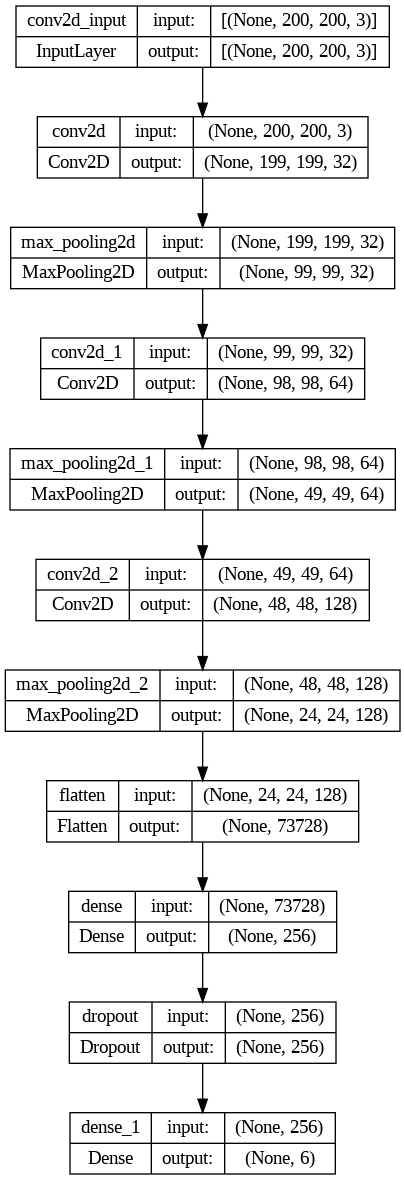

In [7]:
keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True)

In [8]:

#training the model
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=20,
                    validation_data=val_generator,
                    verbose=1,
                    shuffle=True)

Epoch 1/20
166/166 [==============================] - 366s 2s/step - loss: 1.4409 - accuracy: 0.4336 - val_loss: 0.6598 - val_accuracy: 0.8194
Epoch 2/20
166/166 [==============================] - 18s 106ms/step - loss: 0.6639 - accuracy: 0.7554 - val_loss: 0.4481 - val_accuracy: 0.8611
Epoch 3/20
166/166 [==============================] - 18s 107ms/step - loss: 0.4804 - accuracy: 0.8327 - val_loss: 0.5600 - val_accuracy: 0.8333
Epoch 4/20
166/166 [==============================] - 19s 114ms/step - loss: 0.4102 - accuracy: 0.8533 - val_loss: 0.3429 - val_accuracy: 0.8750
Epoch 5/20
166/166 [==============================] - 18s 106ms/step - loss: 0.3019 - accuracy: 0.8979 - val_loss: 0.1469 - val_accuracy: 0.9444
Epoch 6/20
166/166 [==============================] - 19s 115ms/step - loss: 0.2869 - accuracy: 0.8937 - val_loss: 0.1513 - val_accuracy: 0.9583
Epoch 7/20
166/166 [==============================] - 18s 106ms/step - loss: 0.3885 - accuracy: 0.8653 - val_loss: 0.5767 - val_accu

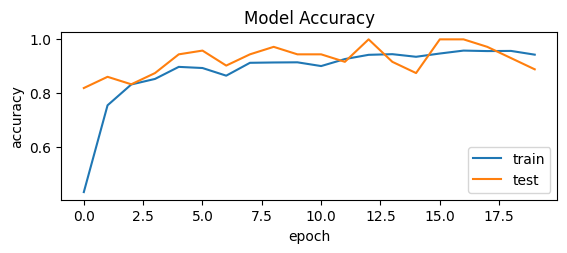

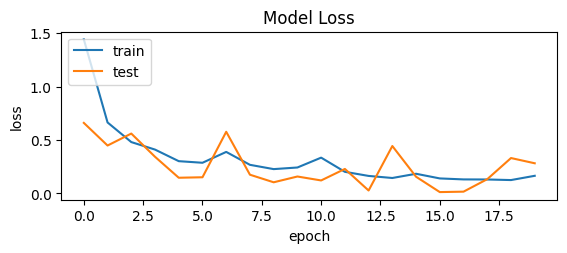

In [9]:
#plotting accuracy and loss graphs
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
#test result visualisation

def load_dataset(path):
  data = load_files(path)
  files = np.array(data['filenames'])
  targets = np.array(data['target'])
  target_labels = np.array(data['target_names'])

  return files, targets, target_labels

x_test, y_test, target_labels = load_dataset(test_data)

no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [11]:
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [12]:
def convert_image_to_array(files_path):
    images_as_array=[]
    for file in files_path:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [13]:
x_test = x_test.astype('float32')/255

3/3 [==============================] - 0s 55ms/step


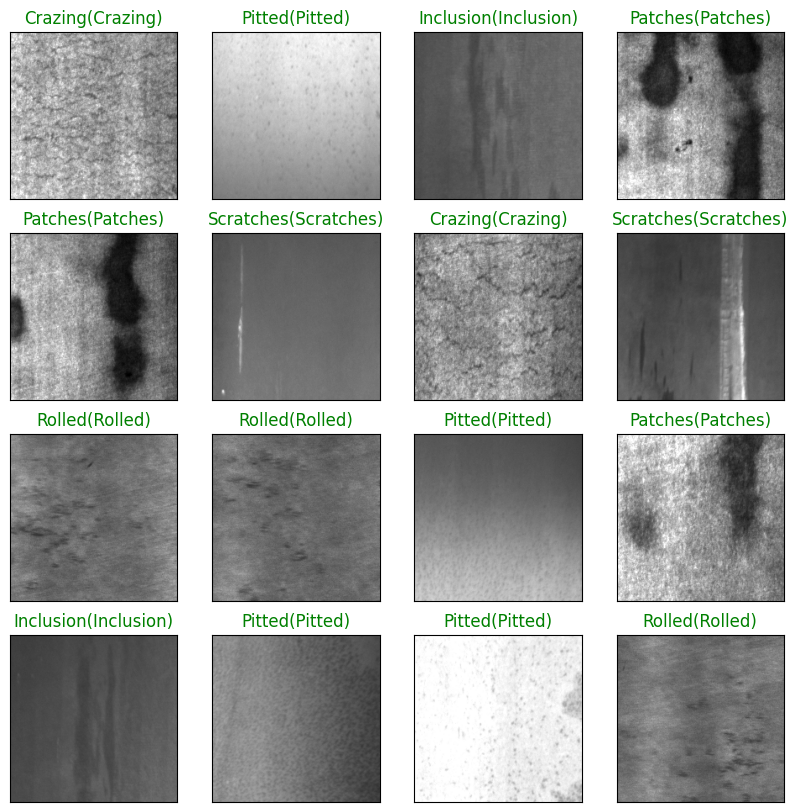

In [14]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(10,10))

for i,idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
  ax = fig.add_subplot(4,4,i+1,xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_pred[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{}({})".format(target_labels[pred_idx], target_labels[true_idx]), color=("green" if pred_idx == true_idx else "red"))


In [15]:
model.save('SDDM.h5')
print("Model Saved!")

Model Saved!
